# Correlation in fuel swelling data

In [1]:
import copy
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean, stdev

In [2]:
jar = pd.read_csv('clean_data.csv')

fdData = [[] for _ in range(7)]
fdVals = jar['FD'].unique()

for i, val in enumerate(fdVals):
    fd = jar[jar['FD'] == val]
    fd = fd.drop(['FD', 'fuel_gas_swelling'], axis=1)
    fdData[i] = fd

I need a pairwise scatterplot to see the full picture.

In [3]:
swell_data = pd.DataFrame()

for ind in range(7):
    swell_data[f'{ind+1}e21'] = fdData[ind]['fuel_swelling'].tolist()

swell_data

,1e21,2e21,3e21,4e21,5e21,6e21,7e21
0,4.3648,8.3467,13.012,20.767,32.409,44.947,59.106
1,4.3610,8.3217,12.831,20.012,30.831,42.531,55.711
2,4.3508,8.3160,12.854,20.121,31.053,42.858,56.152
3,4.3717,8.3671,13.207,21.659,34.343,47.989,63.498
4,4.3759,8.3823,12.984,20.335,31.314,43.137,56.435
...,...,...,...,...,...,...,...
3195,4.3283,8.2984,12.675,19.093,28.679,39.050,50.651
3196,4.3722,8.3745,12.888,19.830,30.181,41.342,53.860
3197,4.3955,8.4127,12.816,19.196,28.718,39.041,50.597
3198,4.3865,8.3689,12.988,20.567,31.970,44.283,58.190


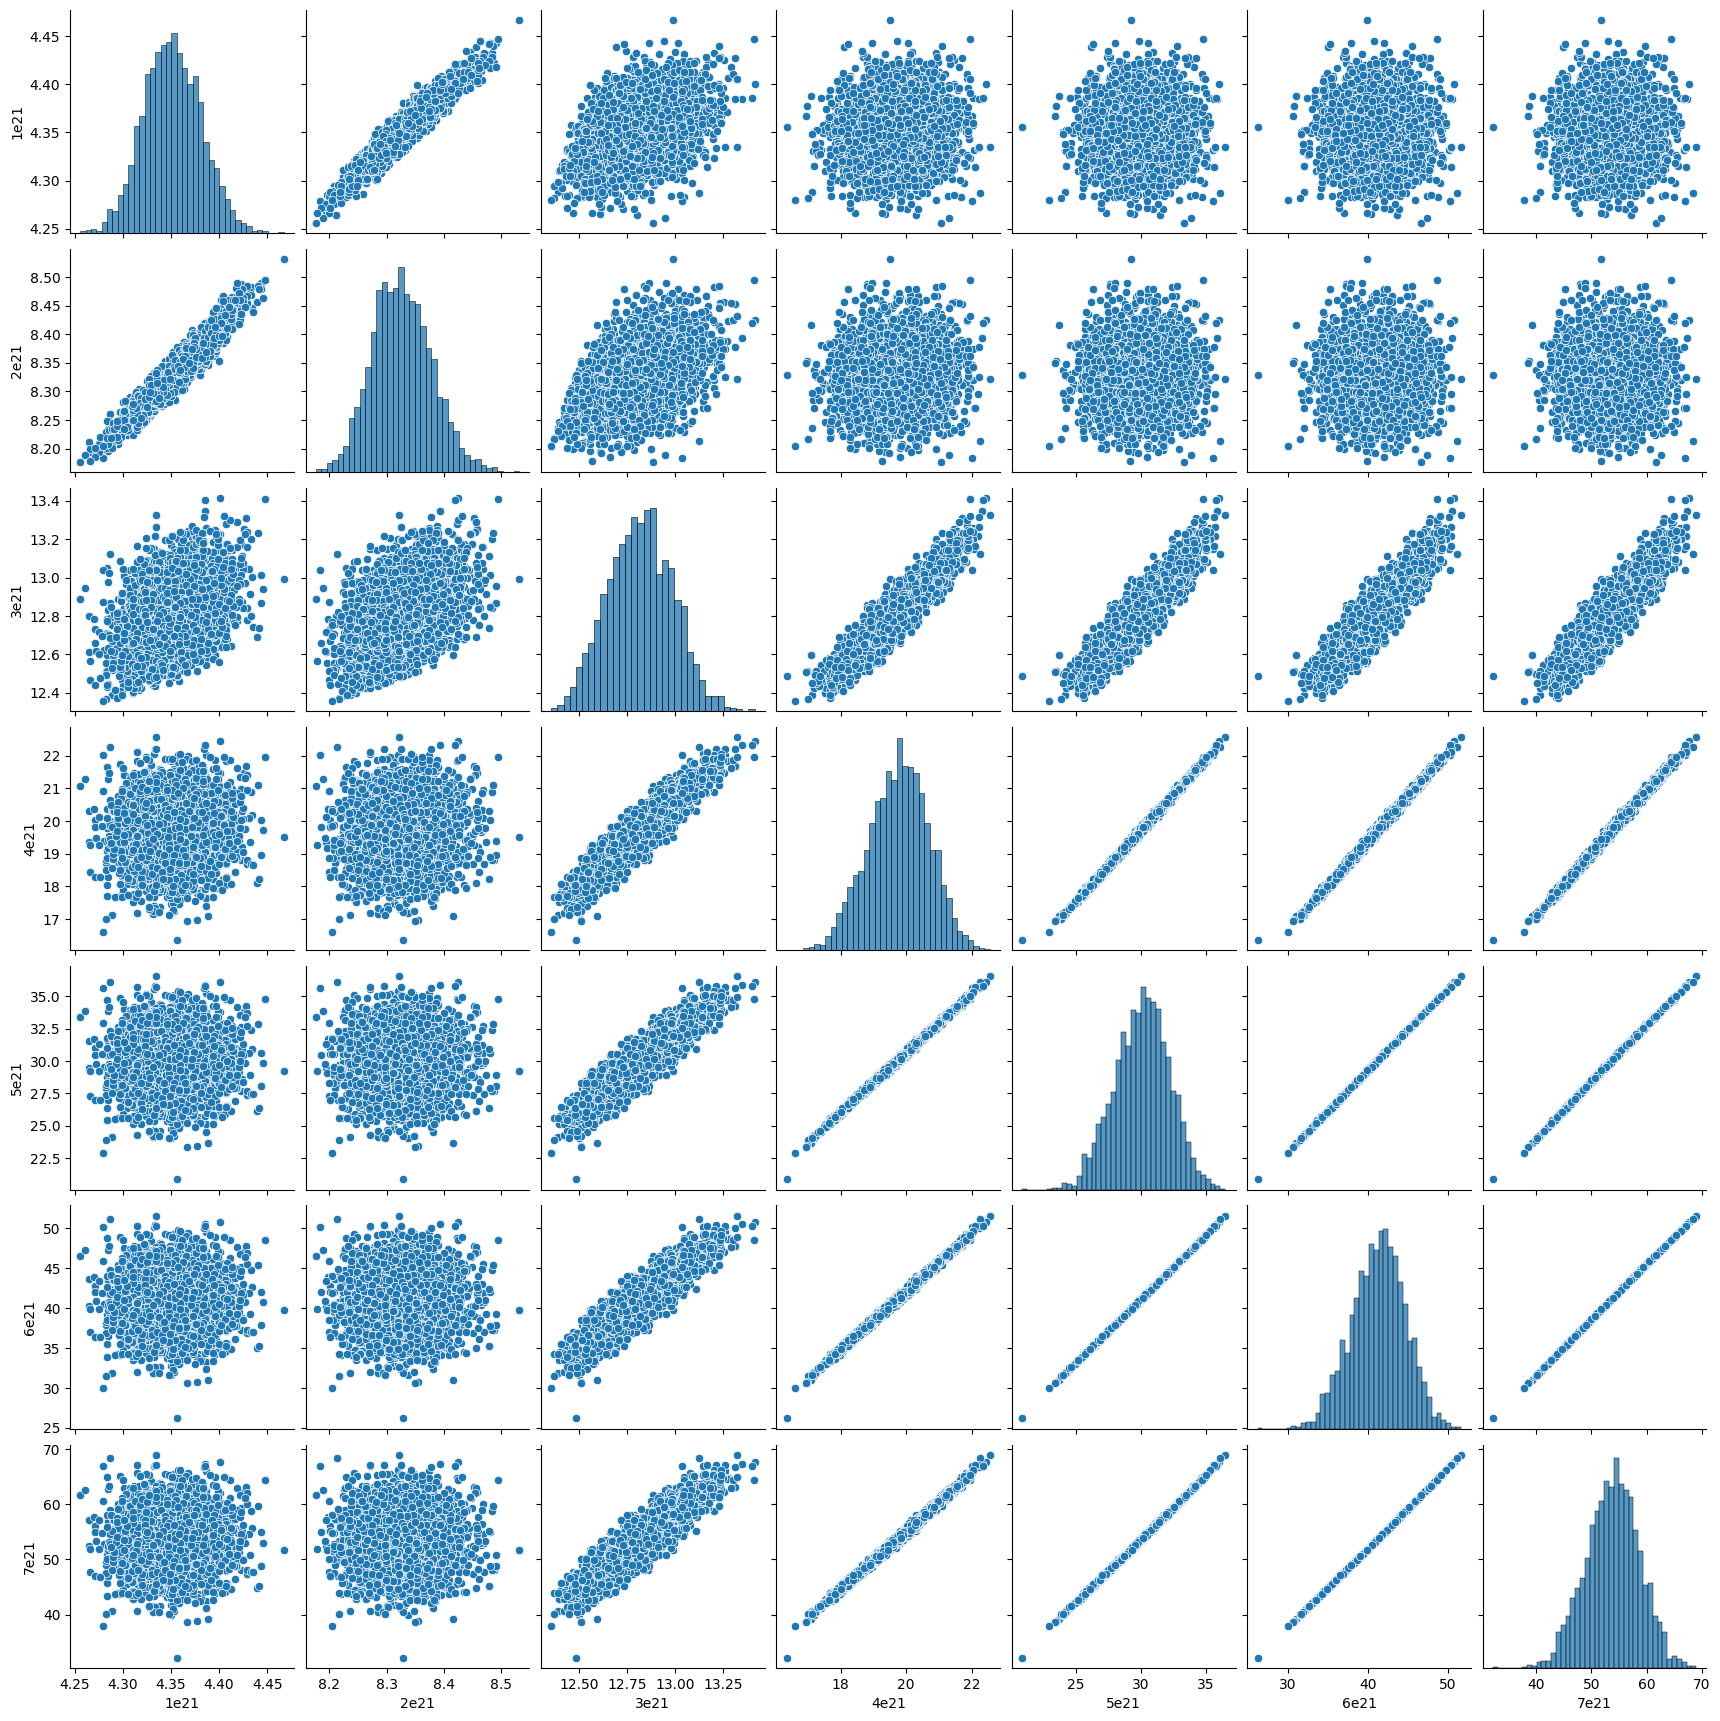

In [4]:
sns.pairplot(swell_data, corner=False)

# Swelling range in target vs model

(+/-)5.28 swelling% covers 95% of the data.

Sigma = 2.7 swelling%.

In [5]:
def swelling_perc(fd):
    return 6.13e-43 * fd**2 + 4e-21 * fd

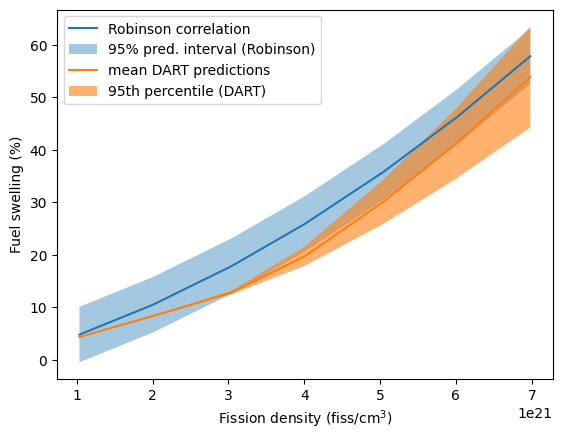

In [6]:
y_exp = [swelling_perc(x) for x in fdVals]

plt.plot(fdVals, y_exp, label='Robinson correlation')
exp_hi = [y + 5.28 for y in y_exp]
exp_lo = [y - 5.28 for y in y_exp]
plt.fill_between(fdVals, exp_lo, exp_hi, alpha=0.4,
                 label='95% pred. interval (Robinson)')

y_mod = []
e_mod = []
for x, data in zip(fdVals, fdData):
    y_mod.append(mean(data['fuel_swelling']))
    e_mod.append(stdev(data['fuel_swelling']))

plt.plot(fdVals, y_mod, label='mean DART predictions')
mod_hi = [i + 2*j for i, j in zip(y_mod, e_mod)]
mod_lo = [i - 2*j for i, j in zip(y_mod, e_mod)]
plt.fill_between(fdVals, mod_lo, mod_hi, alpha=0.6,
                 label='95th percentile (DART)')

plt.xlabel(r'Fission density (fiss/cm$^3$)')
plt.ylabel('Fuel swelling (%)')

plt.legend()
plt.show()

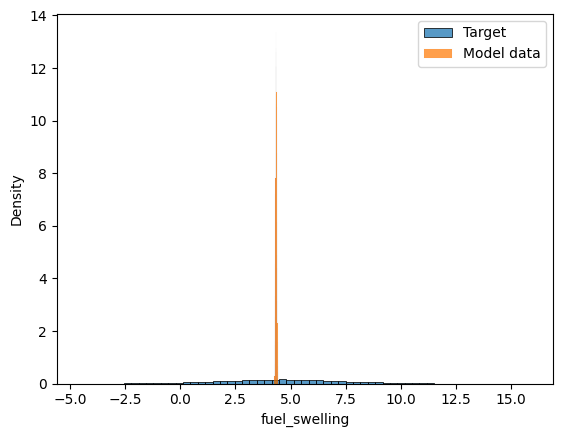

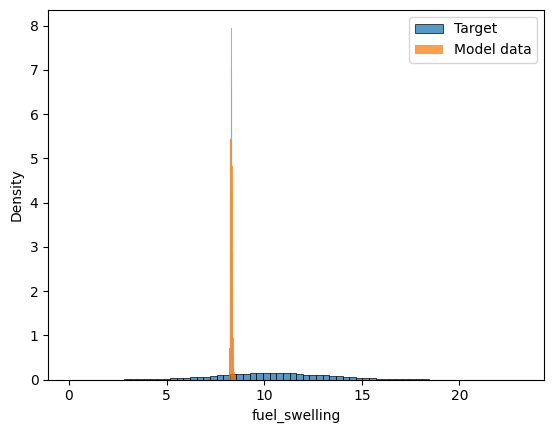

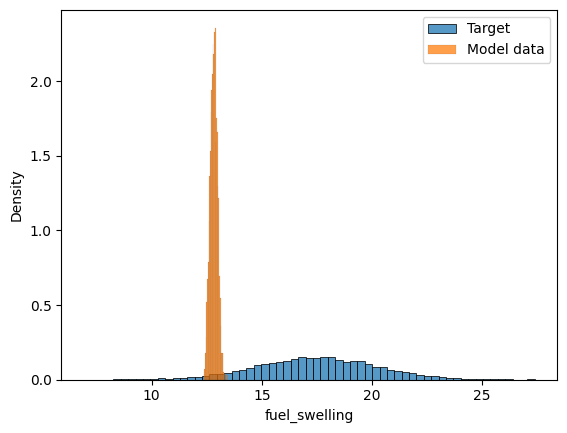

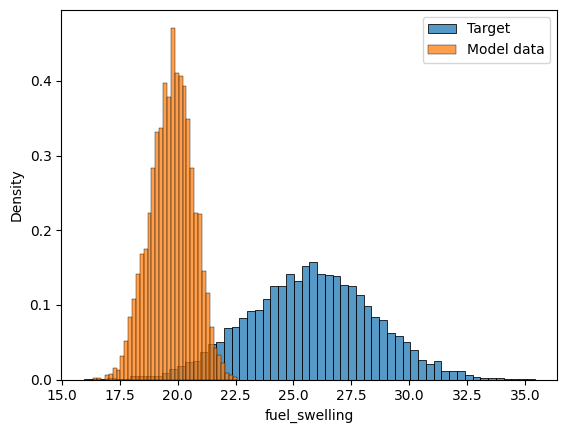

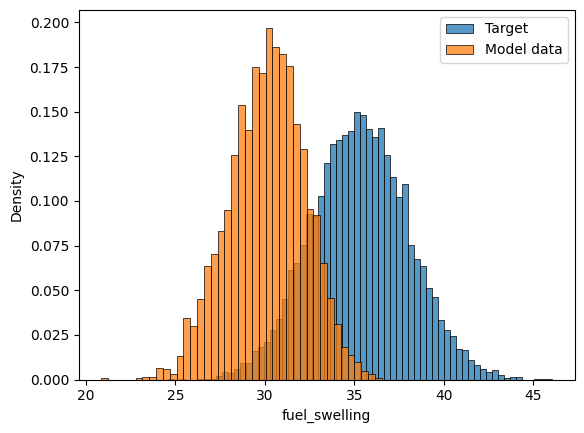

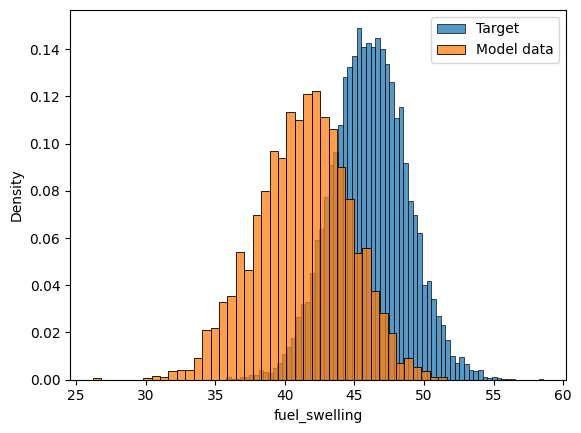

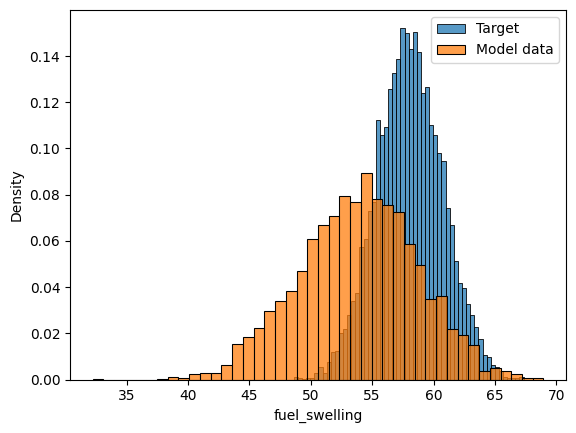

In [7]:
for fd in range(1, 8):
    sns.histplot(np.random.normal(swelling_perc(fd*1e21), 2.7, 10000),
                 stat='density', label='Target')
    sns.histplot(fdData[fd-1]['fuel_swelling'],
                 stat='density', label='Model data')
    
    #plt.xlim([12, 14])
    #plt.ylim([0, 0.25])
    plt.legend()
    plt.show()